In [1]:
import os, sys
os.environ['R_HOME'] = sys.exec_prefix + '/lib/R/'
import numpy as np
import pandas as pd
import scanpy as sc
import scFates as scf
import matplotlib.pyplot as plt

In [2]:
geo = 'GSE162534'
pth = os.path.join('..', '..')
pth_in = os.path.join(pth, 'data')
pth_data = os.path.join(pth_in, 'processed')
pth_traj = os.path.join(pth_in, 'trajectories')
pth_out = os.path.join(pth, 'figures', 'preprocessing')

In [3]:
df_summary = pd.read_csv(os.path.join(pth_in, 'summary.csv'))
df_summary = df_summary.loc[df_summary.Source == geo]
df_summary

,Source,Name,Study,Species,Trajectory,Age,Description
1,GSE162534,Primitive Streak,"Scheibner et al., 2021",mmusculus,True,Early-Late Streak,Gastrulation dataset analyzing EMT programs du...


In [4]:
adata = sc.read_h5ad(os.path.join(pth_data, f'{geo}.h5ad'))
adata

AnnData object with n_obs × n_vars = 8725 × 19013
    obs: 'sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'celltype'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable'
    uns: 'celltype_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [5]:
adata_traj = sc.read_h5ad(os.path.join(pth_traj, f'{geo}.h5ad'))
adata_traj

AnnData object with n_obs × n_vars = 7817 × 219
    obs: 'sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'celltype', 't', 'seg', 'edge', 'milestones'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable', 'p_val', 'A', 'fdr', 'st', 'signi', 'clusters'
    uns: 'celltype_colors', 'graph', 'leiden', 'log1p', 'milestones_colors', 'neighbors', 'pca', 'pseudotime_list', 'sample_colors', 'seg_colors', 'stat_assoc_list', 'umap'
    obsm: 'X_R', 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'fitted'
    obsp: 'connectivities', 'distances'

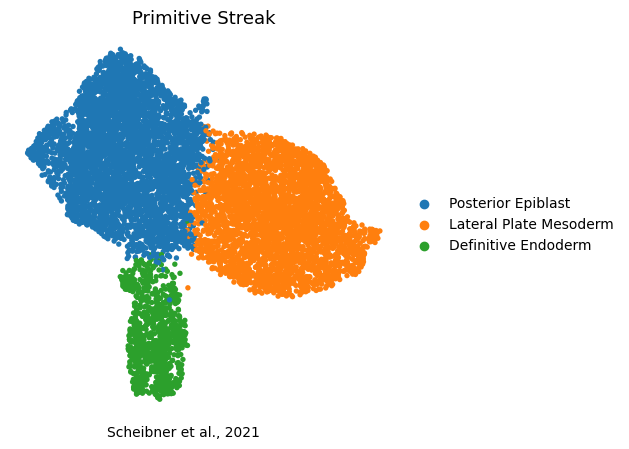

In [6]:
s = 60
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
sc.pl.umap(adata, color = 'celltype', size = s,
           frameon = False, show = False, ax = ax)
ax.invert_xaxis()
ax.set_title(df_summary.Name.values[0], size = 13)
ax.text(.25, -.05, df_summary.Study.values[0],
        transform = ax.transAxes)
fn = os.path.join(pth_out, 'processed', f'{geo}.pdf')
plt.savefig(fn, bbox_inches = 'tight')

/home/caleb/miniconda3/envs/scFates/lib/python3.11/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


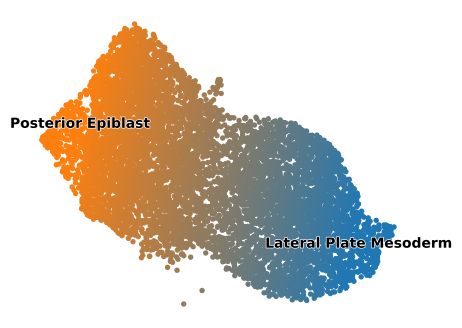

In [7]:
fig, ax = plt.subplots(1, 1, figsize = (5, 4))
scf.pl.milestones(adata_traj, basis = 'umap', s = s,
                  annotate = True, show = False, ax = ax)
ax.invert_xaxis()
ax.set_axis_off()
ax.set_title('')
fn = os.path.join(pth_out, 'trajectories', f'{geo}.pdf')
plt.savefig(fn, bbox_inches = 'tight')

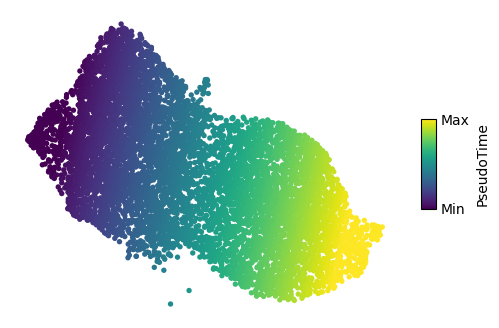

In [8]:
fig, ax = plt.subplots(1, 1, figsize = (5.5, 4))
sc.pl.umap(adata_traj, color = 't', size = s, colorbar_loc = None,
           frameon = False, show = False, ax = ax)
ax.invert_xaxis()
ax.set_title('')
m = ax.collections[0]
cbar = fig.colorbar(m, label = 'PseudoTime', fraction = .035,
                    pad = .05, shrink = .8, aspect = 6, ax = ax)
cbar.ax.set_yticks(m.get_clim(), ['Min', 'Max'])
cbar.ax.tick_params(size = 0)
fn = os.path.join(pth_out, 'pseudotime', f'{geo}.pdf')
plt.savefig(fn, bbox_inches = 'tight')

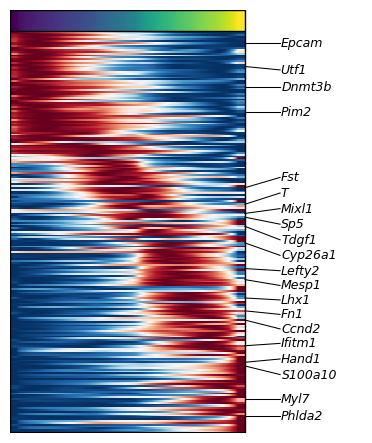

In [9]:
ax = scf.pl.trends(adata_traj, features = adata_traj.var_names,
                   ordering = 'quantile', n_features = 20,
                   style = 'italic', plot_emb = False,
                   figsize = (5, 5.5), show = False)
fn = os.path.join(pth_out, 'features', f'{geo}.pdf')
plt.savefig(fn, bbox_inches = 'tight')